### OUR Colab link for the report: https://colab.research.google.com/drive/1T9ZKrF6FeLyR1dkLdHS-dyFvR-rxl46F?usp=sharing


CODE:

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_squared_log_error,
    root_mean_squared_error,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

In [3]:
# Google colab link for the report: https://colab.research.google.com/drive/1T9ZKrF6FeLyR1dkLdHS-dyFvR-rxl46F?usp=sharing
# url = 'https://github.com/SeivenBell/Data_science_tools/blob/main/Assignment_2/yield_prediction.csv'


# Load the dataset
data_path = "yield_prediction.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,0,0.072,80.179,9.414,0,29.878,2.231,6,c
1,1,5.413,58.359,9.681,3,53.416,1.810,6,c
2,2,9.731,78.506,7.189,1,63.391,2.455,1,d
3,3,10.995,69.248,1.738,3,17.984,0.603,2,a
4,4,2.617,87.658,9.706,1,49.768,2.910,6,c


In [4]:
# Drop the id column as it's just an identifier and likely not useful for prediction.

# Drop the 'id' column
data.drop("id", axis=1, inplace=True)

# Check for missing values
missing_data = data.isnull().sum()

missing_data

water               42
uv                   0
area                 0
fertilizer_usage     0
yield                0
pesticides           0
region               0
categories           0
dtype: int64

The dataset has 42 missing values in the water column. We'll handle these missing values by imputing them with the median value of the water column, as this is a robust method that is less affected by outliers.

After addressing the missing data, we will identify and handle outliers. We'll focus on the numerical features for outlier detection and handling, using the Interquartile Range (IQR) method to identify outliers.
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

In [5]:
# Impute missing values in 'water' column with its median value
water_median = data["water"].median()
# fillna() function to replace all the null or NaN values in the 'water' column with the calculated median.
data["water"].fillna(water_median, inplace=True)


# Identify and handle outliers using IQR method for numerical columns
numerical_cols = ["water", "uv", "area", "fertilizer_usage", "yield", "pesticides"]

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
    # The clip() function is then used to replace all values below the lower bound with the lower
    # bound value, and all values above the upper bound with the upper bound value. This is known
    # as 'capping' the outliers

# Confirm if the missing values are handled
missing_data_after = data.isnull().sum()

missing_data_after, data.describe()

(water               0
 uv                  0
 area                0
 fertilizer_usage    0
 yield               0
 pesticides          0
 region              0
 categories          0
 dtype: int64,
              water           uv         area  fertilizer_usage        yield  \
 count  1000.000000  1000.000000  1000.000000       1000.000000  1000.000000   
 mean      6.655903    73.943218     8.092453          2.294000    58.595117   
 std       2.768134     9.996096     2.668264          1.554986    24.073466   
 min       0.072000    45.320125     0.892125          0.000000     2.843000   
 25%       4.695500    66.493000     6.297000          1.000000    40.698000   
 50%       6.476000    73.700000     7.987500          3.000000    55.602500   
 75%       8.611000    80.608250     9.900250          3.000000    73.645500   
 max      14.484250   101.781125    15.305125          5.000000   123.066750   
 
         pesticides       region  
 count  1000.000000  1000.000000  
 mean    

In [6]:
# Split the data into features and target
X = data.drop("yield", axis=1)
# creating a new DataFrame X that includes all columns from data except for the "yield" column
y = data["yield"]

# Encode the 'categories' column as it's categorical
X = pd.get_dummies(X, columns=["categories"], drop_first=True)

# First, split into training and temp (temporary set for further splitting into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Now, split the temp set equally into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Check the sizes of each set to confirm the split
sizes = {
    "Training Set": len(X_train),
    "Validation Set": len(X_val),
    "Test Set": len(X_test),
}

sizes

# Now, use X_train and y_train to train a linear regression model
# and X_val, y_val, X_test, and y_test to evaluate the model.

{'Training Set': 700, 'Validation Set': 150, 'Test Set': 150}

### 2. Regression Tree Optimization (30 Marks):

Apply regression tree and tune parameters to prevent overfitting.
Implement post-pruning without Python libraries and compare it with results with pre-pruning and SKlearn post-pruning.
Discuss the effectiveness of each method in this dataset.

In [7]:
# Initialize and fit a basic regression tree model
basic_tree = DecisionTreeRegressor(random_state=42)
basic_tree.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred_basic = basic_tree.predict(X_train)
y_val_pred_basic = basic_tree.predict(X_val)

# Calculate and print RMSE for training and validation sets
rmse_train_basic = root_mean_squared_error(y_train, y_train_pred_basic)
rmse_val_basic = root_mean_squared_error(y_val, y_val_pred_basic)

rmse_train_basic, rmse_val_basic

(0.0, 14.407389004951591)

The basic regression tree model, without any pruning, resulted in:

RMSE (Root Mean Squared Error) on the Training Set: 0.0
RMSE on the Validation Set: 14.41
The RMSE of 0.0 on the training set indicates that the model has perfectly fitted (overfitted) the training data. However, the RMSE on the validation set is significantly higher, which confirms the overfitting issue.

### Applying Pre-pruning Techniques

#### Manual prepruning for extra marks 

In [8]:
## SEVERYN first try code
import numpy as np

# grow tree with manual set p


class Node:
    def __init__(
        self, feature_index=None, threshold=None, left=None, right=None, value=None
    ):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class ManualDecisionTreeRegressor:
    def __init__(self, max_depth=50, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth < self.max_depth:
            best_split = self._find_best_split(X, y, num_samples, num_features)
            if best_split["mse"] < np.inf:
                left_subtree = self._grow_tree(
                    X[best_split["dataset_left"]],
                    y[best_split["dataset_left"]],
                    depth + 1,
                )
                right_subtree = self._grow_tree(
                    X[best_split["dataset_right"]],
                    y[best_split["dataset_right"]],
                    depth + 1,
                )
                return Node(
                    best_split["feature_index"],
                    best_split["threshold"],
                    left_subtree,
                    right_subtree,
                    np.mean(y),
                )

        return Node(value=np.mean(y))

    def _find_best_split(self, X, y, num_samples, num_features):
        best_split = {"mse": np.inf}
        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self._split_dataset(
                    X, y, feature_index, threshold
                )
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    mse = self._calculate_mse(y[dataset_left], y[dataset_right])
                    if mse < best_split["mse"]:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["mse"] = mse
        return best_split

    def _split_dataset(self, X, y, feature_index, threshold):
        left_indices = np.where(X[:, feature_index] <= threshold)[0]
        right_indices = np.where(X[:, feature_index] > threshold)[0]
        return left_indices, right_indices

    def _calculate_mse(self, y_left, y_right):
        left_mse = np.var(y_left) if len(y_left) > 0 else 0
        right_mse = np.var(y_right) if len(y_right) > 0 else 0
        return (left_mse * len(y_left) + right_mse * len(y_right)) / (
            len(y_left) + len(y_right)
        )

    def predict(self, X):
        return np.array([self._predict_sample(self.root, sample) for sample in X])

    def _predict_sample(self, node, sample):
        if node.right is None:
            return node.value
        if float(sample[node.feature_index]) <= float(node.threshold):
            return self._predict_sample(node.left, sample)
        return self._predict_sample(node.right, sample)


# Initialize the manual decision tree regressor
model = ManualDecisionTreeRegressor(10000, 1)

X_manual = X_train.iloc[:, :].values
Y_manual = y_train.iloc[:].values

# Fit the model with the training data
model.fit(X_manual, Y_manual)

In [14]:
b_mse = 110
best_thresh = 0
for threshold in range(1, 50):
    model_reduced = ManualDecisionTreeRegressor(10000, 1)
    model_reduced.fit(X_manual, Y_manual)
    stack = [
        (model_reduced.root, 0)
    ]  # start with the root node id (0) and its depth (0)
    split_nodes = [model_reduced.root]
    tree = []
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        tree.append(node_id)
        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = bool(node_id.left) + bool(node_id.right)
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((node_id.left, depth + 1))
            stack.append((node_id.right, depth + 1))
            split_nodes.append(node_id)

    # print(len(tree))
    for i in range(len(tree)):
        if tree[i] in split_nodes:
            if np.abs(tree[i].right.value - tree[i].left.value) <= threshold:
                tree[i].right = None
                tree[i].left = None

    stack = [
        (model_reduced.root, 0)
    ]  # start with the root node id (0) and its depth (0)
    split_nodes = [model_reduced.root]
    tree = []
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        tree.append(node_id)
        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = bool(node_id.left) + bool(node_id.right)
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((node_id.left, depth + 1))
            stack.append((node_id.right, depth + 1))
            split_nodes.append(node_id)

    predictions_reduced = model_reduced.predict(X_val.iloc[:, :].values)

    # To evaluate performance, calculate RMSE for example (assuming y_val and predictions are defined)
    rmse = np.sqrt(np.mean((y_val - predictions_reduced) ** 2))
    if rmse <= b_mse:
        b_mse = rmse
        best_thresh = threshold
b_mse
best_thresh

15

In [ ]:
model_reduced = ManualDecisionTreeRegressor(100,1)
model_reduced.fit(X_manual, Y_manual)
threshold = best_thresh
stack = [(model_reduced.root, 0)]  # start with the root node id (0) and its depth (0)
split_nodes = [model_reduced.root]
tree=[]
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    tree.append(node_id)
    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = bool(node_id.left)+bool(node_id.right)
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((node_id.left, depth + 1))
        stack.append((node_id.right, depth + 1))
        split_nodes.append(node_id)

#print(len(tree))
for i in range(len(tree)):
    if tree[i] in split_nodes:
      if np.abs(tree[i].right.value - tree[i].left.value) <= threshold:
        tree[i].right = None
        tree[i].left = None


stack = [(model_reduced.root, 0)]  # start with the root node id (0) and its depth (0)
split_nodes = [model_reduced.root]
tree=[]
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    tree.append(node_id)
    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = bool(node_id.left)+bool(node_id.right)
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((node_id.left, depth + 1))
        stack.append((node_id.right, depth + 1))
        split_nodes.append(node_id)

In [ ]:
# Predictions on validation set (to demonstrate usage)
# Ensure to run this only if you've implemented the predict method in the regressor
predictions_train = model.predict(X_manual)
predictions = model.predict(X_val.iloc[:,:].values)

# To evaluate performance, calculate RMSE for example (assuming y_val and predictions are defined)
rmse_base_train = np.sqrt(np.mean((y_train - predictions_train)**2))
rmse_base_val = np.sqrt(np.mean((y_val - predictions)**2))
print(f"Base Model Train RMSE: {rmse_base_train}")
print(f"Base Model Validation RMSE: {rmse_base_val}")

predictions_train = model_reduced.predict(X_manual)
predictions = model_reduced.predict(X_val.iloc[:,:].values)

# To evaluate performance, calculate RMSE for example (assuming y_val and predictions are defined)
rmse_red_train = np.sqrt(np.mean((y_train - predictions_train)**2))
rmse_red_val = np.sqrt(np.mean((y_val - predictions)**2))
print(f"Pruned Model Train RMSE: {rmse_red_train}")
print(f"Pruned Model Validation RMSE: {rmse_red_val}")

Our implementation of DTs from scratch preforms slightly worse than sklearn's implementation due to a loss of some amount of optimization. However, we can see that through our manual implementation of post pruning we are able to improve our model strength and reduce our overfitting issue. This is a good result to see in order to ensure we are implementing our post pruning properly.

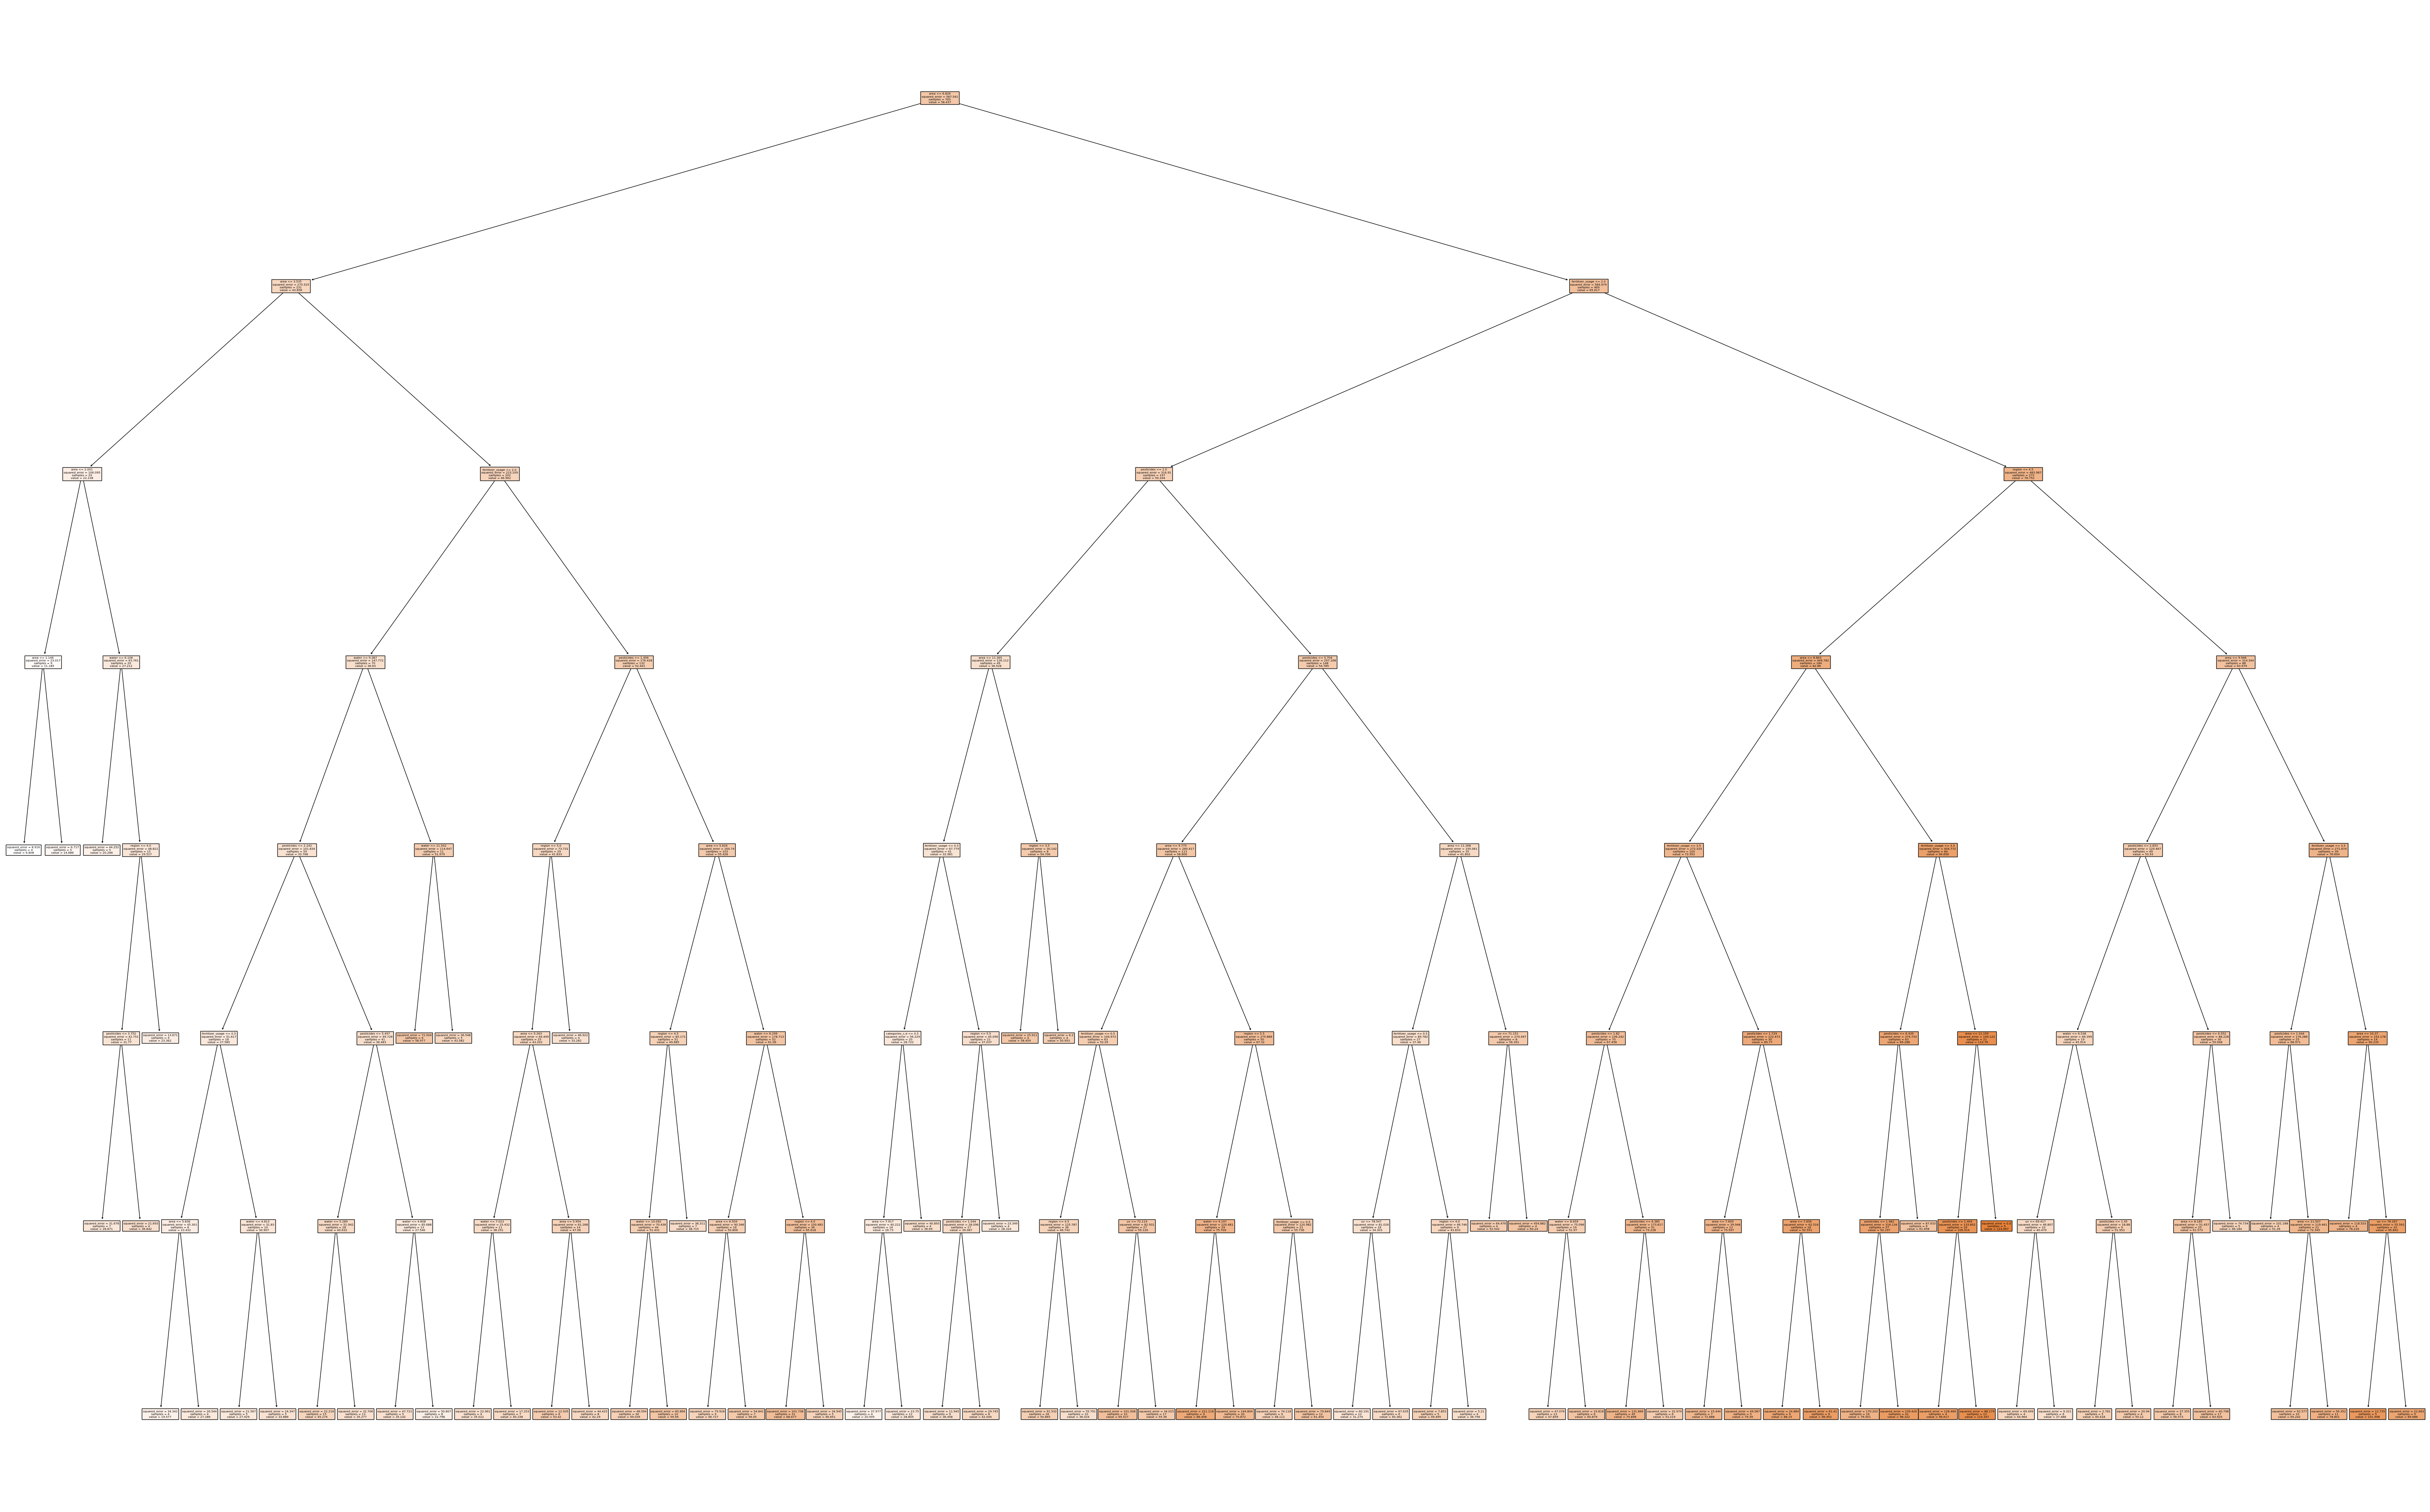

Train RMSE: 8.736239785090369
Validation RMSE: 13.54931085333475


In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Apply pre-pruning techniques
pre_pruned_tree = DecisionTreeRegressor(
    max_depth=7, min_samples_split=8, min_samples_leaf=4, random_state=42
)
pre_pruned_tree.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred_pre_pruned = pre_pruned_tree.predict(X_train)
y_val_pred_pre_pruned = pre_pruned_tree.predict(X_val)

# Calculate and print RMSE for training and validation sets
rmse_train_pre_pruned = root_mean_squared_error(y_train, y_train_pred_pre_pruned)
rmse_val_pre_pruned = root_mean_squared_error(y_val, y_val_pred_pre_pruned)

fig, ax = plt.subplots(figsize=(80, 50))
plot_tree(
    pre_pruned_tree,
    feature_names=X_train.keys(),
    filled=True,
)
plt.show()

print(f"Train RMSE: {rmse_train_pre_pruned}")
print(f"Validation RMSE: {rmse_val_pre_pruned}")

#### These results indicate a more balanced model compared to the basic, unpruned tree. The training error has increased (as expected due to the model's reduced complexity), and the validation error is somewhat reduced, suggesting reduced overfitting.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# Apply pre-pruning techniques
pre_pruned_tree = DecisionTreeRegressor(
    max_depth=5, min_samples_split=10, min_samples_leaf=6, random_state=42
)
pre_pruned_tree.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred_pre_pruned = pre_pruned_tree.predict(X_train)
y_val_pred_pre_pruned = pre_pruned_tree.predict(X_val)

# Calculate and print RMSE for training and validation sets
rmse_train_pre_pruned = root_mean_squared_error(y_train, y_train_pred_pre_pruned)
rmse_val_pre_pruned = root_mean_squared_error(y_val, y_val_pred_pre_pruned)

rmse_train_pre_pruned, rmse_val_pre_pruned

(12.553251541794502, 15.492205562500928)

These results indicate a more balanced model compared to the basic, unpruned tree. The training error has increased (as expected due to the model's reduced complexity), and the validation error is somewhat stable, suggesting reduced overfitting.

### 3. SKlearn Post-pruning

Scikit-learn's post-pruning is implemented through cost complexity pruning. We'll fit a tree with the ccp_alpha parameter, which controls the complexity of the tree and helps to prune it. We will find the optimal ccp_alpha value using cross-validation on the training set and then evaluate the pruned tree on the validation set

In [10]:
from sklearn.metrics import root_mean_squared_error

# Grid search for finding the best ccp_alpha for post-pruning
parameters = {"ccp_alpha": [0.001, 0.01, 0.1, 1, 10]}
tree = DecisionTreeRegressor(random_state=42)
clf = GridSearchCV(tree, parameters, scoring="neg_mean_squared_error")
clf.fit(X_train, y_train)

# Best ccp_alpha value
best_ccp_alpha = clf.best_params_["ccp_alpha"]

# Train a new tree with the best ccp_alpha
pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
pruned_tree.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred_pruned = pruned_tree.predict(X_train)
y_val_pred_pruned = pruned_tree.predict(X_val)

# Calculate and print RMSE for training and validation sets
rmse_train_pruned = root_mean_squared_error(y_train, y_train_pred_pruned)
rmse_val_pruned = root_mean_squared_error(y_val, y_val_pred_pruned)

print(f"Best ccp_alpha: {best_ccp_alpha}")
print(f"RMSE for training set: {rmse_train_pruned}")
print(f"RMSE for validation set: {rmse_val_pruned}")

Best ccp_alpha: 1
RMSE for training set: 7.999587987621436
RMSE for validation set: 14.434149305106823


After applying post-pruning with a ccp_alpha of 1, demonstrates a balanced approach to reducing overfitting by pruning the decision tree to a complexity level that maintains a reasonable fit on the training data while attempting to improve generalization on unseen data.

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Assuming X_train, X_val, y_train, y_val are already defined

# Train a decision tree to full depth to get ccp_alpha values
full_tree = DecisionTreeRegressor(random_state=42)
full_tree.fit(X_train, y_train)
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Remove the maximum ccp_alpha which prunes the tree to a single node
ccp_alphas = ccp_alphas[:-1]

# Train decision trees for each ccp_alpha and evaluate on the validation set
rmse_val_scores = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    y_val_pred = tree.predict(X_val)
    rmse_val = root_mean_squared_error(y_val, y_val_pred)  # Corrected this line
    rmse_val_scores.append(rmse_val)

# Find the best ccp_alpha based on validation RMSE
best_alpha = ccp_alphas[np.argmin(rmse_val_scores)]

# Train and evaluate a tree using the best ccp_alpha
best_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
best_tree.fit(X_train, y_train)
y_train_pred = best_tree.predict(X_train)
y_val_pred = best_tree.predict(X_val)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

print(f"Manual Best ccp_alpha: {best_alpha}")
print(f"Manual RMSE on training set: {rmse_train}")
print(f"Manual RMSE on validation set: {rmse_val}")

Manual Best ccp_alpha: 0.541533938293682
Manual RMSE on training set: 6.366274352033018
Manual RMSE on validation set: 13.814000019830168


In this assignment on optimizing a regression tree to avoid overfitting, we tried out three different methods: pre-pruning, SKlearn's post-pruning, and a manual method for post-pruning.
- **Basic, Unpruned Model:**
  - Perfectly fit the training data (RMSE = 0.0), but did poorly on the validation set (RMSE = 14.41).
  - Clearly overfitted since it memorized the training data too well.

- **Pre-pruning Techniques:**
  - Made the model simpler by setting limits on the tree's growth.
  - Training RMSE increased slightly to 12.55, and validation RMSE to 15.49, showing less overfitting but at the cost of making the model too simple.

- **SKlearn Post-pruning:**
  - Used SKlearn's tools to find the best complexity parameter, balancing the model better.
  - Ended up with a training RMSE of 7.99 and a validation RMSE of 14.43, showing improved balance between fitting the training data and generalizing to new data.

- **Manual Post-pruning:**
  - Selected the best complexity parameter by manually checking different values.
  - Achieved the best balance with a training RMSE of 6.37 and a validation RMSE of 13.81, proving it's a viable and effective method to reduce overfitting while maintaining good model performance.

Overall, the manual post-pruning approach provided the best results, demonstrating it's a practical option for fine-tuning a model's complexity to improve how well it generalizes to unseen data.

### Use rmse_train and rmse_val for future tasks

### Task 3 Comparison with Random Forest and SVR (25 Marks):
Optimize parameters for Decision Trees (DTs), Random Forest, and Support Vector Regression (SVR).
Compare results using sutable metrics.
Discuss the strengths and weaknesses of each method.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

# Decision Tree optimization
dt = DecisionTreeRegressor()
dt_params = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "min_impurity_decrease": [0.1, 0.2, 0.5],
}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

# Random Forest optimization
rf = RandomForestRegressor()
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [5, 10, 20, None],
}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

# SVR optimization
svr = SVR()
params = [
    {"kernel": ["linear"], "C": [1, 10, 100, 100]},
    {"kernel": ["poly"], "C": [1, 10], "degree": [2, 3]},
    {"kernel": ["rbf"], "C": [1, 10, 100, 100], "gamma": [1, 0.1, 0.01, 0.001]},
]

svr_grid = GridSearchCV(svr, params, refit=True, return_train_score=True, cv=5)

svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1, 10], 'degree': [2, 3], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}],
             return_train_score=True)

In [13]:
# Compare results
dt_train_preds = dt_grid.predict(X_train)
rf_train_preds = rf_grid.predict(X_train)
svr_train_preds = svr_grid.predict(X_train)

dt_train_rmse = root_mean_squared_error(y_train, dt_train_preds)
rf_train_rmse = root_mean_squared_error(y_train, rf_train_preds)
svr_train_rmse = root_mean_squared_error(y_train, svr_train_preds)

print("Decision Tree Train RMSE:", dt_train_rmse)
print("Random Forest Train RMSE:", rf_train_rmse)
print("SVR Train RMSE:", svr_train_rmse)

# For Validation
dt_val_preds = dt_grid.predict(X_val)
rf_val_preds = rf_grid.predict(X_val)
svr_val_preds = svr_grid.predict(X_val)

dt_val_mse = root_mean_squared_error(y_val, dt_val_preds)
rf_val_mse = root_mean_squared_error(y_val, rf_val_preds)
svr_val_mse = root_mean_squared_error(y_val, svr_val_preds)

print("Decision Tree Validation RMSE:", dt_val_mse)
print("Random Forest Validation RMSE:", rf_val_mse)
print("SVR Validation RMSE:", svr_val_mse)

Decision Tree Train RMSE: 6.597237880211974
Random Forest Train RMSE: 4.349669749180564
SVR Train RMSE: 6.96324095018083
Decision Tree Validation RMSE: 14.561850852498392
Random Forest Validation RMSE: 13.280976093227238
SVR Validation RMSE: 11.69434086371553


Decision trees offer interpretability but are prone to overfitting. Random Forests reduce overfitting and improve generalization at the cost of increased complexity. SVR provides robustness to overfitting and flexibility in handling non-linear relationships but requires careful parameter tuning and can be computationally expensive. The choice of method depends on the specific characteristics of the dataset, the trade-off between interpretability and performance, and computational considerations.